[src](http://www.igi.tugraz.at/lehre/MLA/WS07/MLA_AffinityPropagation.pdf)

### Unsupervised learning
* given: data with no labels
* output: a probablistic model of data p(x) e.g. bayesian network

### Clustering
* unsupervised grouping or segmenting data points
* objects within a cluster are more similar to each other than with those in other clusters

### Gaussian Mixture Models
* $p(x) = \sum_i^K p(z_k) p(x | z_k) = \sum_i^K \pi_k N(x | \mu_k, \Sigma_k)$
* clustering: figure out the MLE of the parameters $\pi_k$, $\mu_k$ and $\Sigma_k$

### Nonparametric Clustering 
* given datapoints x and pairwise similarities $d(x_i, x_j)$
* allows hierarchical clustering
* can be applied to non-metric data (e.g. text, graph, websites)

### Two different approaches
* mixutre models
    * data points in common feature space
    * metric to measure distances (e.g. euclidean)
    * prototype may be different from input data
        * prototype is the representation for the cluster e.g. cluster mean in K-Means
    * parametric model for each cluster, sufficient statistics, optimization is prone to local minima
    * e.g. GMM w/ EM
* pairwise distances
    * many data points do not have coordinates e.g. text, graph, website
    * computing pairwise similarity is still similar (e.g. word cooccurence,)
    * learn only cluster assignment (no probabilistic interpretation)
    * prototypes for every cluster


### Criteria for clustering
* mixutre models 
    * data likelihood 
* pairwise similarities
    * minimizing within cluster scatter $W(C) = \frac{1}{2} \sum_{i=1}^k \sum_{c(j) = i} \sum_{c(j') = i} d(x_j, x_{j'})$
    * equivalent to miximizing between cluster scatter $B(C) = \frac{1}{2} \sum_{i=1}^k \sum_{c(j) = i} \sum_{c(j') \neq i} d(x_j, x_{j'})$
    * because $W(C) + B(C) = constant$ 


### k-Medoids clustering
* in some cases we cannot compute mean
* cluster centers must be training cases
* for cluster i to k: 
    * find $\mu_i = x_j$ with $c(j) = 1$, such that total distance to other cluster points is minimized
    * $\mu_i = argmin$ .... <finish this>
* basically k-means' alternative to k-means

### k-Medoids vs k-means
* k-Medoids
    * works with any metric (only distance matrix required)
    * returns cluster exemplars
* k-means
    * requires euclidean space and metric
    * returns probablistic model

### affinity propagation
* uses only distance / similarity matrix
* extension of k-medoids 
    * k-medoids randomly chooses k initial cluster exemplars
    * affinity propagation considers all data points as potential exemplars
* regards data points as nodes in a graph
* propagates real-valued messages between data-points
* automatically detects clusters, exemplars and # of clusters

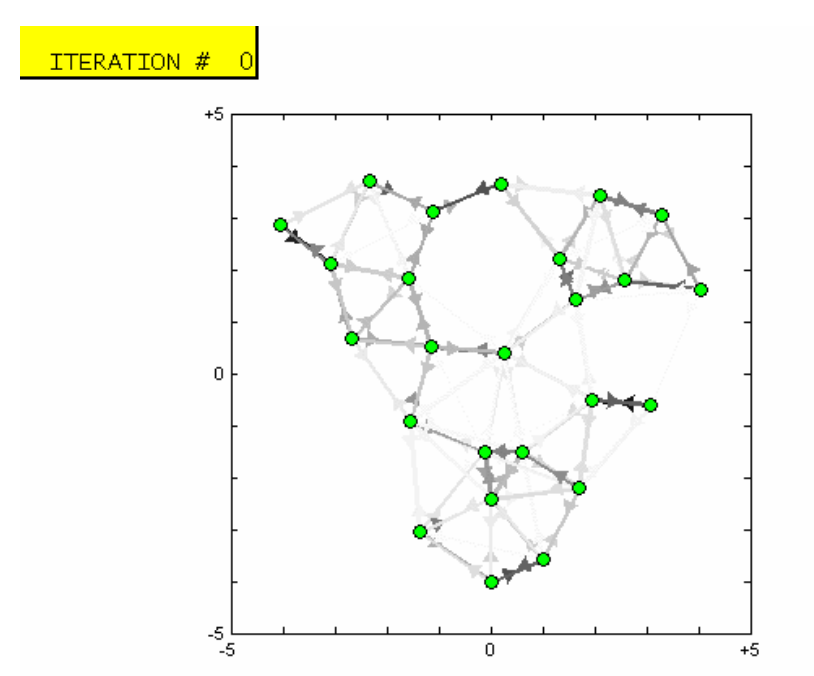

In [1]:
from IPython.display import Image
Image(filename='aff_prog_diag.png') 

### Advantages of AP
* deterministic (initiallization doesn't matter)
    * doesn't care about the local minima problem w/ k-means or k-medoids
* automatic determination of # of clusters
* can be extended to probalistic mixture model
* don't care about symmetric or triangle inequality

### Message passing
* messages represent current affinities of one data point for choosing another point as its exemplar
* two kinds of messages:
    * responsibility: data pt -> candidate exemplar
        * how good is an exemplar compared to all other exemplars
    * availability: candidate exemplar -> data pt
        * how good is exemplar for data point given all other dat apoints

### responsiblities
* responsibility r(i, k), data point i to exemplar k
* update rule: $r(i, k) = s(i, k) + max_{k' \neq k} (a(i, k') + s(i, k'))$
    * s(i, k) is the similarity
    * a(i, k) is the availability
* candidate exemplars compete for ownership of data points
* a(i, k) is 0 initially
* first iteration: responsbility = similarity - largest other similarity 
* availability later reflects: how many other points favor k as an exemplar

### availabilities
* availability a(i, k), potential exemplar k to data point i
* accumulated evidence for k being the exemplar of i, taking support from other points i’ for k into account
* If many points choose k as exemplar, k should survive as an exemplar
* update rule: $a(i, k) = min ( 0 ,  r(k,k) + \sum_{i' \in {i, k}} max(0, r(i', k)) )$
* collect evidence from data points whether k is a good exemplar
* why only positive? exemplar only needs to explain part of data



### Affinity Propagation Update Rules
* update r(i, k) then update a(i, k) many times
* all r(i,i) + a(i, i) > 0 are chosen as candidate exemplars
* assign nonexemplars to exemplars as cluster (prototype)

# I SKIPPED THE PROPABILITISTIC & FACTOR GRAPH STUFF

### use cases
* movie clustering (# common viewer / # total viewer as similarity measure)
* flight map: negative fastest flight time + stopover delay
* face clustering: euclidean distance